<a href="https://colab.research.google.com/github/Shreyas0786/Iris-Flower-Detection/blob/main/Iris_Flower_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
# Create a Model Class that inherits nn.Module

class Model(nn.Module):

  # Input layer (4 features of the flower)
  # Hidden layer1 (number of neurons)
  # Hidden Layer2 (number of neurons)
  # Output Layer (3 classes of iris flowers)

  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):

    #instantiate our nn.Module
    super().__init__()
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2,out_features)

  def forward(self,x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x

In [3]:
# Pick a manual seed for randomization

torch.manual_seed(32)

# Create an instance of model

model = Model()

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)


In [6]:
my_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [7]:
# Change last column from string to integers
my_df['species'] = my_df['species'].replace('setosa', 0.0)
my_df['species'] = my_df['species'].replace('versicolor', 1.0)
my_df['species'] = my_df['species'].replace('virginica', 2.0)
my_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [8]:
# Train Test Split! Set X,y

X = my_df.drop('species', axis = 1)
y = my_df['species']


In [9]:
# Convert these to numpy arrays

X = X.values
y = y.values

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
# Train Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 32)

In [12]:
# Convert X Features to Float Tensor

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [13]:
# Convert Y Labels to Tensors Long

y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [14]:
# Set the criterion of model to measure the error, how far off the predictions are from the data
criterion = nn.CrossEntropyLoss()

# Choose Optimizer (Adam) lr = learning rate (If an error doesn't go down after a bunch of iterations i.e epochs lower the learning rate)

optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)


In [15]:
# Train our models

epochs = 100
losses = []
for i in range(epochs):
   # Go forward and get a prediction
  y_pred = model.forward(X_train) # Get predicted results

  # Measure the loss/error

  loss = criterion(y_pred, y_train) # predicted values vs the y_train

  # Keep track of our losses

  losses.append(loss.detach().numpy())

    # Print Every 10 epochs
  if i % 10 == 0:
    print(f'Epoch: {i} and loss: {loss}')

    # Do some back propagation
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


Epoch: 0 and loss: 1.169895887374878
Epoch: 10 and loss: 0.9578844308853149
Epoch: 20 and loss: 0.7988812923431396
Epoch: 30 and loss: 0.634953498840332
Epoch: 40 and loss: 0.44043001532554626
Epoch: 50 and loss: 0.291716992855072
Epoch: 60 and loss: 0.17829042673110962
Epoch: 70 and loss: 0.11587586998939514
Epoch: 80 and loss: 0.08928147703409195
Epoch: 90 and loss: 0.07743765413761139


Text(0.5, 0, 'Epoch')

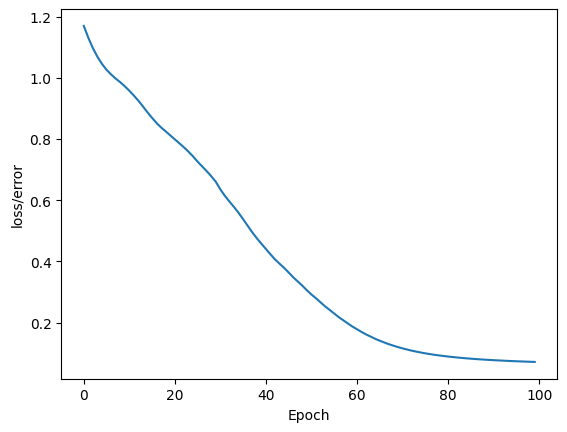

In [16]:
# Graph it out!
plt.plot(range(epochs),losses)
plt.ylabel("loss/error")
plt.xlabel('Epoch')

In [17]:
# Evaluate Model on Test data ser (Validate model on test set)

with torch.no_grad(): # Turning off the back propagation
  y_eval = model.forward(X_test) # X_test are features from our test set, y_eval will be prediction
  loss = criterion(y_eval, y_test) # Find the loss or error

In [18]:
loss

tensor(0.0539)

In [19]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    # Will tell us what type of flower class our network thinks it is
    print (f'{i+1}.) {str(y_val)} \t {y_test[i]}')

    # Correct or Not
    if y_val.argmax().item() == y_test[i]:
      correct += 1

print (f'We got {correct} correct!')

1.) tensor([-3.3580,  3.9452,  0.3616]) 	 1
2.) tensor([  7.5862,   1.1113, -11.3861]) 	 0
3.) tensor([  6.6288,   1.5092, -10.4603]) 	 0
4.) tensor([-3.3304,  4.2647,  0.0569]) 	 1
5.) tensor([-7.3705,  2.8135,  5.1481]) 	 2
6.) tensor([-7.3749,  3.9061,  4.2781]) 	 2
7.) tensor([  6.2304,   1.6527, -10.0543]) 	 0
8.) tensor([  6.8783,   1.4056, -10.7016]) 	 0
9.) tensor([-2.6728,  4.3138, -0.6444]) 	 1
10.) tensor([  7.2201,   1.3890, -11.1494]) 	 0
11.) tensor([-3.8269,  4.4110,  0.5165]) 	 1
12.) tensor([-8.6886,  1.9990,  6.9012]) 	 2
13.) tensor([-2.0605,  3.8275, -0.7672]) 	 1
14.) tensor([-1.0676,  4.3809, -2.2975]) 	 1
15.) tensor([-7.5000,  2.6230,  5.3318]) 	 2
16.) tensor([-8.6214,  1.5491,  7.1280]) 	 2
17.) tensor([-3.7724,  3.6503,  0.9422]) 	 1
18.) tensor([-6.7624,  2.7791,  4.5289]) 	 2
19.) tensor([-1.6978,  4.2047, -1.4772]) 	 1
20.) tensor([  7.8104,   1.3824, -11.9435]) 	 0
21.) tensor([  6.9175,   1.5954, -10.9322]) 	 0
22.) tensor([-9.4323,  2.7058,  7.2346]) 	 

In [20]:
# Creating new data points (Iris)

new_iris = torch.tensor([3.4, 4.0, 5.6, 0.2])


In [21]:
with torch.no_grad():
  print (model(new_iris))

tensor([ 0.4264,  4.1337, -3.7992])


In [22]:
# Save our NN Model
torch.save(model.state_dict(), 'Flower_Detection_Iris_model.pt')


In [23]:
# Load the Saved Model
new_model = Model()
new_model.load_state_dict(torch.load('Flower_Detection_Iris_model.pt'))

<All keys matched successfully>

In [24]:
# Make sure it loaded correctly

new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)